# Classification

In [32]:
# Every line of code, where I didnt put a source or marked it as AI code, is from moodle and the professors Github repository


# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

In [33]:
import random
import os

# Set a fixed seed value
SEED = 12345

# 1. Set Python's built-in random module seed
random.seed(SEED)

# 2. Set NumPy random seed
np.random.seed(SEED)

# 3. Set TensorFlow seed
tf.random.set_seed(SEED)

# 4. Set environment variables (affects some backend randomness)
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# Optional: control inter-op and intra-op parallelism for determinism
# (can slightly slow down training, but improves reproducibility)
tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)

In [34]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

df.head() 

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.00,1.62,64.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,0.00,1.00,no,Public_Transportation,Normal_Weight
1,Female,21.00,1.52,56.00,yes,no,3.00,3.00,Sometimes,yes,3.00,yes,3.00,0.00,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.00,1.80,77.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,2.00,1.00,Frequently,Public_Transportation,Normal_Weight
3,Male,27.00,1.80,87.00,no,no,3.00,3.00,Sometimes,no,2.00,no,2.00,0.00,Frequently,Walking,Overweight_Level_I
4,Male,22.00,1.78,89.80,no,no,2.00,1.00,Sometimes,no,2.00,no,0.00,0.00,Sometimes,Public_Transportation,Overweight_Level_II


In [35]:
df.shape

(2111, 17)

In [36]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [37]:

df['CAEC'].value_counts()

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

In [38]:
df['CALC'].value_counts()

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

In [39]:
df['MTRANS'].value_counts()

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

In [40]:
from sklearn.preprocessing import OneHotEncoder


df['CAEC'] = df['CAEC'].replace({
    'no': 1,
    'Sometimes': 2,
    'Frequently': 3,
    'Always': 4
})

df['CALC'] = df['CALC'].replace({
    'no': 1,
    'Sometimes': 2,
    'Frequently': 3,
    'Always': 4
})

hot_encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")


variables_hot = ['MTRANS']
one_hot_encoded = hot_encoder.fit_transform(df[variables_hot]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables_hot)



C:\Users\dalli\AppData\Local\Temp\ipykernel_3464\4075777745.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CAEC'] = df['CAEC'].replace({
C:\Users\dalli\AppData\Local\Temp\ipykernel_3464\4075777745.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CALC'] = df['CALC'].replace({


In [41]:
from sklearn.preprocessing import LabelEncoder

le_variables = [ 'Gender','family_history_with_overweight', 'SMOKE', 'SCC', 'FAVC']

label_encoder = LabelEncoder()

df[le_variables] = df[le_variables].apply(label_encoder.fit_transform)



In [42]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [43]:
# I wanted to reduce the possible outputs, so I grouped some of them together

df['NObeyesdad'] = df['NObeyesdad'].replace({
    'Insufficient_Weight': '1: Insufficient_Weight',
    'Normal_Weight': '2: Normal_Weight',
    'Overweight_Level_I': '3: Overweight',
    'Overweight_Level_II': '3: Overweight',
    'Obesity_Type_I': '4: Obesity',
    'Obesity_Type_II': '4: Obesity',
    'Obesity_Type_III': '4: Obesity'
})

df['NObeyesdad'].value_counts()




NObeyesdad
4: Obesity                972
3: Overweight             580
2: Normal_Weight          287
1: Insufficient_Weight    272
Name: count, dtype: int64

In [44]:

# here I saw that the weight would indicate the output directly, so I dropped it

df = df.drop('Weight', axis=1)

df.head()

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.00,1.62,1,0,2.00,3.00,2,0,2.00,0,0.00,1.00,1,2: Normal_Weight,0,0,0,1,0
1,0,21.00,1.52,1,0,3.00,3.00,2,1,3.00,1,3.00,0.00,2,2: Normal_Weight,0,0,0,1,0
2,1,23.00,1.80,1,0,2.00,3.00,2,0,2.00,0,2.00,1.00,3,2: Normal_Weight,0,0,0,1,0
3,1,27.00,1.80,0,0,3.00,3.00,2,0,2.00,0,2.00,0.00,3,3: Overweight,0,0,0,0,1
4,1,22.00,1.78,0,0,2.00,1.00,2,0,2.00,0,0.00,0.00,2,3: Overweight,0,0,0,1,0


In [45]:
X = df.drop('NObeyesdad', axis=1)
y_temp = df['NObeyesdad']

le = LabelEncoder()
y_enc = le.fit_transform(y_temp)

y = tf.keras.utils.to_categorical(y_enc)


categories = list(le.classes_)
categories

['1: Insufficient_Weight', '2: Normal_Weight', '3: Overweight', '4: Obesity']

In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)


chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

best_features = chi_2_features.fit(X_cat,y.astype(int))

pd.options.display.float_format = '{:.2f}'.format

df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
1,Age,392.05
11,FAF,178.21
12,TUE,143.43
3,family_history_with_overweight,104.97
18,MTRANS_Walking,98.46
10,SCC,76.02
7,CAEC,39.64
6,NCP,24.69
4,FAVC,21.65
14,MTRANS_Automobile,17.08


In [47]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [48]:
import keras_tuner

def build_model(hp):
    model = keras.Sequential()

    model.add(layers.BatchNormalization(input_shape=(len(X.columns),)),)
    
    model.add(
        layers.Dense(
            units=hp.Int(f"units_0", min_value=4, max_value=96, step=4),
            activation=hp.Choice("activation", ["relu"]),
            kernel_regularizer=keras.regularizers.l1(hp.Float("l1", min_value=0.025, max_value=0.35, sampling="log"))
        )
    )
        
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(
            hp.Float("rate", min_value=0.1, max_value=0.5, step=0.025)
            ))

    for i in range(hp.Int("num_layers", 1, 3)):
        model.add(
            layers.Dense(
                units=hp.Int(f"units_{i + 1}", min_value=8, max_value=96, step=4),
                activation=hp.Choice("activation", ["relu"]),
            )
        )

    model.add(layers.Dense(len(categories), activation="softmax"))

    learning_rate = hp.Float("lr", min_value=1e-5, max_value=1e-1, sampling="log")

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy', metrics=['accuracy']
    )

    return model


build_model(keras_tuner.HyperParameters())

tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=2,
    overwrite=True,
    directory="optimizations1",
    project_name="classification1test",
)

tuner.search(X_train, y_train, epochs=250, validation_data=(X_val, y_val))

Trial 5 Complete [00h 01m 09s]
val_accuracy: 0.6720867455005646

Best val_accuracy So Far: 0.7547425329685211
Total elapsed time: 00h 06m 06s


In [49]:
tuner.results_summary()

Results summary
Results in optimizations1\classification1test
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
units_0: 64
activation: relu
l1: 0.14404386359839785
dropout: True
num_layers: 2
units_1: 92
lr: 0.0005495772755430749
rate: 0.1
units_2: 8
Score: 0.7547425329685211

Trial 4 summary
Hyperparameters:
units_0: 84
activation: relu
l1: 0.09277436194925
dropout: False
num_layers: 2
units_1: 48
lr: 8.236127782483122e-05
rate: 0.275
units_2: 16
units_3: 32
Score: 0.6720867455005646

Trial 1 summary
Hyperparameters:
units_0: 76
activation: relu
l1: 0.030030643841972265
dropout: True
num_layers: 3
units_1: 12
lr: 3.933578568657208e-05
rate: 0.375
units_2: 80
units_3: 8
Score: 0.640921413898468

Trial 3 summary
Hyperparameters:
units_0: 80
activation: relu
l1: 0.06506737046346531
dropout: True
num_layers: 1
units_1: 72
lr: 0.072305430326835
rate: 0.25
units_2: 8
units_3: 84
Score: 0.6287263035774231

Trial 2 summary
Hyperparameter

In [50]:
models = tuner.get_best_models(num_models=1)
best_model = models[0]
best_model.summary()

c:\Python312\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 19)             │            76 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 92)             │         5,980 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,116 (31.70 KB)

 Trainable params: 8,078 (31.55 KB)

 Non-trainable params: 38 (152.00 B)

In [63]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

mc = ModelCheckpoint('best_model_classification1_kt.keras', monitor='val_accuracy', mode='max', save_best_only=True)

callback_list = [mc]



model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(len(X.columns),)),
        layers.Dense(19, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.0005773619717484751)),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.1),
        layers.Dense(92, activation="relu"),
        layers.Dense(8, activation="relu"),
        layers.Dense(4, activation="relu"),
        layers.Dense(len(categories), activation="softmax")
    ]
)

optimal_lr = 0.0005773619717484751

model.compile(optimizer=keras.optimizers.Adam(learning_rate=optimal_lr), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Python312\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_2           │ (None, 19)             │            76 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 19)             │           380 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 92)             │         5,980 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │           744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4)              │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,516 (33.27 KB)

 Trainable params: 8,478 (33.12 KB)

 Non-trainable params: 38 (152.00 B)

In [52]:

model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_val, y_val), callbacks=callback_list)

Epoch 1/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4483 - loss: 1.4163 - val_accuracy: 0.4770 - val_loss: 1.3696
Epoch 2/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4555 - loss: 1.3714 - val_accuracy: 0.4770 - val_loss: 1.3917
Epoch 3/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4555 - loss: 1.2692 - val_accuracy: 0.4770 - val_loss: 1.5039
Epoch 4/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5124 - loss: 1.1897 - val_accuracy: 0.4905 - val_loss: 1.2951
Epoch 5/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5386 - loss: 1.1427 - val_accuracy: 0.5149 - val_loss: 1.1567
Epoch 6/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5503 - loss: 1.1072 - val_accuracy: 0.5149 - val_loss: 1.0889
Epoch 7/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5583 - loss: 1.0835 - val_accuracy: 0.5095 - val_loss: 1.0384
Epoch 8/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5620 - loss: 1.0618 - val_accuracy: 0.5149 - v

<Axes: >

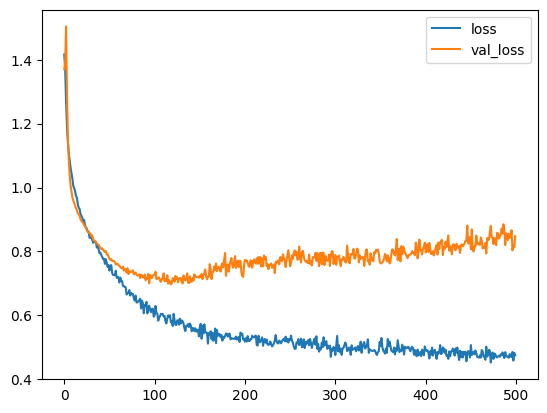

In [53]:
# There seems to be no overfitting, since accuracy and val_accuracy are nearly the same

loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

<Axes: >

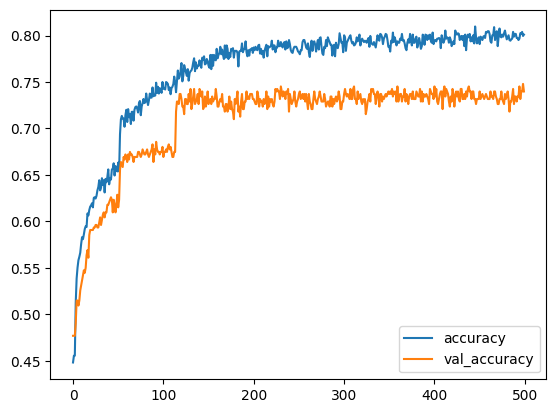

In [54]:


loss_df[['accuracy', 'val_accuracy']].plot()

In [55]:
# This matrix shows that the train and test data evaluation is nearly the same
# This is good because it indicates that learns on new data the same well as on the training data (no overfitting)
# The model guessed about 70% of the data correctly

print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
[1.1310052871704102, 0.6945946216583252]

Train data evaluation:
[0.6477342247962952, 0.7551020383834839]


In [56]:
test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=1)

y_test = np.argmax(y_test, axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


<Axes: >

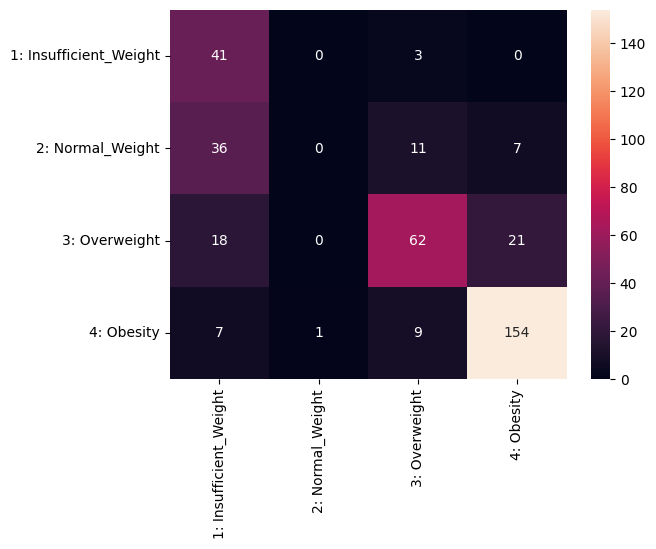

In [57]:
# The heatmap shows, what weight groups are estimated correctly from our model and how many are were categorized wrong.
# Notable is, that if the model chose obesity, it was correct most of the time. It was sometimes categorized as overweight and only a few time
# as normal or insufficient weight. Normal weight was not categorized very well. most people with normal weight were categorized wrong
# People, which were classified as overweight were often times obese. only 10 people were normal or insufficient weight. 
# If the model guessed insufficient weight, the model was right most of the time

sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g', 
            xticklabels=categories, yticklabels=categories)

In [58]:
# Interpretation of the classification matrix:
# precision (how often when the model guessed a class, it was correct): precision was the highest for Obesity (0.79) and the worst for normal weight (0.50)
# recall (how many of the actual class instances were guessed correctly): again obisity was the best (0.93) and normal weight the worst (0.30)
# f1-score combines both precisoin and recall
# support (how many datasets of which group are existing): Obesity had the most instances with 182 and insufficient weight the least with 45. 

# to summarize, The model works good for identifying obesity, for the other groups it was not very good.

print(classification_report(y_test, test_predictions, target_names=categories))

acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

                        precision    recall  f1-score   support

1: Insufficient_Weight       0.40      0.93      0.56        44
      2: Normal_Weight       0.00      0.00      0.00        54
         3: Overweight       0.73      0.61      0.67       101
            4: Obesity       0.85      0.90      0.87       171

              accuracy                           0.69       370
             macro avg       0.49      0.61      0.53       370
          weighted avg       0.64      0.69      0.65       370


Model overall accuracy: 69.46%


In [59]:
# the auc score tells us if the model is good or not
# if the score is 0.5, the model is not better than a random guess
# Here the score is 0.89, which is considered as good
# Scores between 0.9 and 1 would classify as excellent

roc_auc_score(y, model.predict(X), multi_class="ovr")

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step


0.8980221711527517

In [60]:
X.columns

Index(['Gender', 'Age', 'Height', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [61]:
df.head(3)

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.00,1.62,1,0,2.00,3.00,2,0,2.00,0,0.00,1.00,1,2: Normal_Weight,0,0,0,1,0
1,0,21.00,1.52,1,0,3.00,3.00,2,1,3.00,1,3.00,0.00,2,2: Normal_Weight,0,0,0,1,0
2,1,23.00,1.80,1,0,2.00,3.00,2,0,2.00,0,2.00,1.00,3,2: Normal_Weight,0,0,0,1,0


In [62]:
tester_row = {
    'Gender': 1,                         
    'Age': 22.77789,                      
    'Height': 1.700499,
    'family_history_with_overweight': 1, 
    'FAVC': 1,                            
    'FCVC': 2.385502,
    'NCP': 3.0,
    'CAEC': 2,                            
    'SMOKE': 0,                          
    'CH2O': 2.0,
    'SCC': 0,                            
    'FAF': 1.0,
    'TUE': 0.62535,
    'CALC': 2,                            
    'MTRANS_Automobile': 0,              
    'MTRANS_Bike': 0,
    'MTRANS_Motorbike': 0,
    'MTRANS_Public_Transportation': 1,
    'MTRANS_Walking': 0
}

tester_row = pd.DataFrame([tester_row])
result = model.predict(tester_row)[0]
result_text = categories[np.argmax(result)]

np.set_printoptions(precision=9, suppress=True)

print(f"Predicted price range: {result_text}")
print()
print("Probabilities by class:")
print(categories)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted price range: 3: Overweight

Probabilities by class:
['1: Insufficient_Weight', '2: Normal_Weight', '3: Overweight', '4: Obesity']
[0.000102416 0.000476515 0.9968817   0.002539396]
